# Analysis of Current Pennsylvania Congressional Districts

In this notebook, we will compile and analyze geospatial data for the 2022 Congressional Districts of Pennsylvania.

In [40]:
import geopandas as gpd

### Congressional Districts

Below is the process of importing the shapefiles of the Congressional Districts for all 50 states. This data is accredited to the U.S. Census.

In [41]:
df = gpd.read_file('data/US_con_dists/cb_2022_us_cd118_500k.shp')

In [42]:
# Extracting data from Pennsylvania
df['area'] = df.area
df_pa = df[df['STATEFP'] == '42']
df_pa.head()

<ipython-input-42-e8d46df4bd33>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['area'] = df.area


,STATEFP,CD118FP,AFFGEOID,GEOID,NAMELSAD,LSAD,CDSESSN,ALAND,AWATER,geometry,area
25,42,14,5001800US4214,4214,Congressional District 14,C2,118,12366528972,88432997,"POLYGON ((-80.51942 39.80618, -80.51923 39.837...",1.316007
72,42,15,5001800US4215,4215,Congressional District 15,C2,118,33623932655,261267443,"POLYGON ((-79.91364 41.27569, -79.91032 41.277...",3.645712
73,42,06,5001800US4206,4206,Congressional District 6,C2,118,2395743848,27827780,"POLYGON ((-76.13645 39.72568, -76.13405 39.727...",0.255800
94,42,12,5001800US4212,4212,Congressional District 12,C2,118,1102513161,20890332,"POLYGON ((-80.12055 40.36003, -80.11994 40.362...",0.119102
95,42,04,5001800US4204,4204,Congressional District 4,C2,118,1880088074,19814929,"POLYGON ((-76.08556 40.36433, -76.08334 40.366...",0.201294


<Axes: >

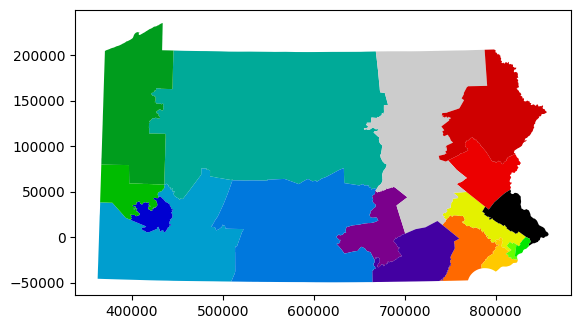

In [66]:
# Displaying the 13 districts of PA
df_pa.plot('NAMELSAD', cmap='nipy_spectral')

### Voting Districts data for PA

These shapefiles are accredited to the Metric Geometry and Gerrymandering Group (MGGG).

In [44]:
pa_vtds = gpd.read_file('data/PA_pop/PA_pop.shp')

In [45]:
pa_vtds.head()

,GEOID20,G18GOVRWAG,G18USSDCAS,NAME,G18USSLKER,VTDST,STATEFP,G18USSGGAL,COUNTYFP,G18USSRBAR,...,AMINPOP10,BCVAP19,BPOP19,BPOP10,NHPIPOP10,WPOP19,WCVAP19,WPOP10,CVAP19,geometry
0,42001000010,185.0,120.0,ABBOTTSTOWN,5.0,000010,42,2.0,001,183.0,...,1.0,0.000000,0.000000,14.0,0.0,865.737199,620.903614,937.0,661.066098,"POLYGON ((664343.521 -31159.417, 664394.941 -3..."
1,42001000020,172.0,151.0,ARENDTSVILLE,6.0,000020,42,3.0,001,178.0,...,5.0,3.857143,7.714286,27.0,0.0,656.233129,518.588957,790.0,559.141982,"POLYGON ((637504.270 -26605.813, 638030.307 -2..."
2,42001000030,98.0,74.0,BENDERSVILLE,1.0,000030,42,2.0,001,103.0,...,7.0,32.352941,38.823529,11.0,0.0,568.033908,392.635336,541.0,472.758530,"POLYGON ((642210.643 -20528.243, 642237.216 -2..."
3,42001000040,554.0,289.0,BERWICK,14.0,000040,42,5.0,001,575.0,...,3.0,70.000000,75.000000,59.0,0.0,2099.817018,1706.445783,2208.0,1880.963042,"MULTIPOLYGON (((664548.709 -30805.093, 664784...."
4,42001000050,215.0,152.0,BIGLERVILLE,3.0,000050,42,7.0,001,231.0,...,1.0,7.153846,14.538462,10.0,0.0,1012.662149,814.375469,1100.0,886.786844,"POLYGON ((642244.314 -26116.364, 642318.415 -2..."


In [48]:
# Get rid of Lake Erie census block
pa_vtds['AREA'] = pa_vtds.area
pa_vtds = pa_vtds[pa_vtds['NAME'] != 'LAKE ERIE']

<Axes: >

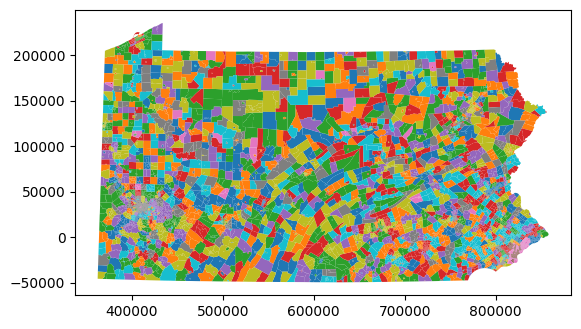

In [50]:
# Display all Pennsylvania voting districts
pa_vtds.plot('NAMELSAD20')

### Analysis Dataset

In [52]:
# Merging spatial data: set the CRS of the congressional districts to that
# of the voting districts dataframe so they can be merged
df_pa = df_pa.to_crs(epsg=6562)
blocks_in_districts = gpd.sjoin(pa_vtds, df_pa)
blocks_in_districts.head()

,GEOID20,G18GOVRWAG,G18USSDCAS,NAME,G18USSLKER,VTDST,STATEFP_left,G18USSGGAL,COUNTYFP,G18USSRBAR,...,STATEFP_right,CD118FP,AFFGEOID,GEOID,NAMELSAD,LSAD,CDSESSN,ALAND,AWATER,area
0,42001000010,185.0,120.0,ABBOTTSTOWN,5.0,000010,42,2.0,001,183.0,...,42,11,5001800US4211,4211,Congressional District 11,C2,118,3888210615,113542371,0.421825
3,42001000040,554.0,289.0,BERWICK,14.0,000040,42,5.0,001,575.0,...,42,11,5001800US4211,4211,Congressional District 11,C2,118,3888210615,113542371,0.421825
9,42001000090,679.0,497.0,CONEWAGO DISTRICT 01,7.0,000090,42,2.0,001,720.0,...,42,11,5001800US4211,4211,Congressional District 11,C2,118,3888210615,113542371,0.421825
10,42001000100,827.0,477.0,CONEWAGO DISTRICT 02,6.0,000100,42,8.0,001,863.0,...,42,11,5001800US4211,4211,Congressional District 11,C2,118,3888210615,113542371,0.421825
15,42001000150,379.0,232.0,EAST BERLIN,7.0,000150,42,6.0,001,389.0,...,42,11,5001800US4211,4211,Congressional District 11,C2,118,3888210615,113542371,0.421825


In [53]:
# Cleaning 
pa_cong_dists = blocks_in_districts.drop([
    'AFFGEOID', 'GEOID', 'STATEFP_left', 'STATEFP_right', 'COUNTYFP', 'VTDST20',
    'COUNTYFP20', 'VTDI20', 'index_right', 'CDSESSN'], axis=1)
pa_cong_dists = pa_cong_dists.rename(columns={'G18GOVRWAG': 'rep_votes_governor18',
                                              'NAME': 'district_name',
                                              'VTDST': 'district_code',
                                              'G18USSRBAR': 'rep_votes_senate18',
                                              'G18USSDCAS': 'dem_votes_senate18',
                                              'G18GOVDWOL':'dem_votes_governor18',
                                              'G16PRERTRU':'rep_votes_president16',
                                              'G16PREDCLI':'dem_votes_president16',
                                              'AREA': 'area_vtds',
                                              'area': 'area_cong_dists',
                                              'GEOID20': 'geographic_ID'})

<Axes: >

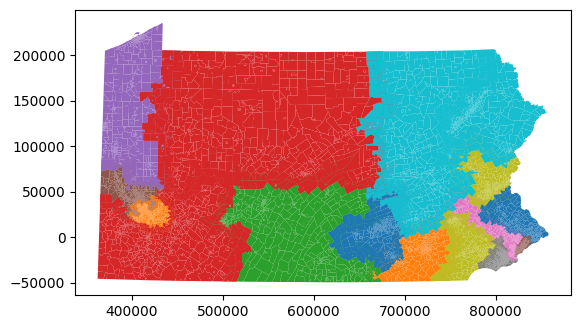

In [56]:
pa_cong_dists.plot('NAMELSAD')